<a href="https://colab.research.google.com/github/Hbrand03/HarshilBrindaResume/blob/Python/IntroAI_Lab3_CSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Constraint Satisfaction Problems
Welcome to the assignment about Constraint Satisfaction Problems (CSPs). CSPs are mathematical questions defined as a set of objects whose state must satisfy a number of constraints or limitations. To understand more about CSP, we will define the Sudoku game as a CSP and implement the code to resolve it.

This assignment will be divided into three parts:
* Reading Sudoku from file (20 pts)
* Implement the SudokuResolver:
  * Converting Sudoku rules into either implicit/explicit constraints (10 pts)
  * Implement the BaseSudokuResolver with multiple helper functions (30 pts)
  * Implement the SimpleSudokuResolver with backtracking method (40 pts)

* [Bonus] Improve the ImprovedSudokuResolver with Constraint Propagation (13.34 pts == 1 credit in the final grade)

## What is Sudoku?

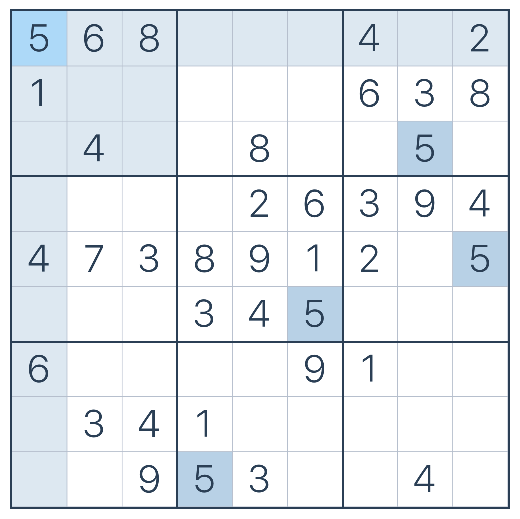

<!--
![Sudoku Example](https://drive.google.com/uc?export=view&id=1RkiDRrAZd29E20BE5jjnexiKWwclfwyH)
-->

Sudoku is a puzzle that has enjoyed worldwide popularity since 2005. To solve a Sudoku puzzle, one needs to use a combination of logic and trial-and-error.

Sudoku is played on a grid of 9 x 9 spaces. Within the rows and columns are 9 “squares” (made up of 3 x 3 spaces). Each row, column and square (9 spaces each) needs to be filled out with the numbers 1-9, without repeating any numbers within the row, column or square.

Source: https://sudoku.com/how-to-play/sudoku-rules-for-complete-beginners/

## Defining Sudoku as a CSP
* Variables: grid[i][j]
* Domains: {1, 2, 3, 4, 5, 6, 7, 8, 9}
* Constraints:
  * The same number can’t appear in the same row twice.
  * The same number can’t appear in the same column twice.
  * The same number can’t appear in the same "square" twice.

Note: This is the square index for a Sudoku grid:

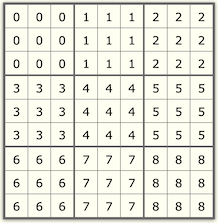
<!--
![picture](https://drive.google.com/uc?id=1NK_y4T9pmN2lZ6QlGaNHZkpFZAgcuPkq)
-->

For example, the cell (row=0, col=0) in the square index 0, while cell(row=3, col=3) in the square index 4. Remeber that the row, col, and square index will start from 0.

# Part1. Reading sudoku grid from a file
Below are the contents of 2 text files sudoku_easy.txt and sudoku_expert.txt. Each text file has 9 lines, and each line has 9 integer numbers from 0-9. To resolve the sudoku puzzle, we need to replace 0 number with a proper number following the rules.

In [ ]:
%%writefile sudoku_easy.txt
5 6 8 0 0 0 4 0 2
1 0 0 0 0 0 6 3 8
0 4 0 0 8 0 0 5 0
0 0 0 0 2 6 3 9 4
4 7 3 8 9 1 2 0 5
0 0 0 3 4 5 0 0 0
6 0 0 0 0 9 1 0 0
0 3 4 1 0 0 0 0 0
0 0 9 5 3 0 0 4 0

Writing sudoku_easy.txt


In [ ]:
%%writefile sudoku_expert.txt
0 0 0 0 0 0 0 4 0
0 0 0 0 7 3 0 0 0
0 0 3 0 5 1 0 0 0
3 0 0 6 0 0 0 0 0
0 4 7 0 1 0 0 0 0
0 0 5 0 0 0 0 0 2
2 7 4 0 0 0 9 1 0
1 0 0 0 4 0 6 8 0
0 3 0 0 0 0 0 0 0

Writing sudoku_expert.txt


## <font color="green">Exercise 1:</font> Implement the code for load_grid() function (20 pts)
The first task you need to complete in this assignment is writing the code to load the content in the text file and save it to a 9x9 numpy array.

<font color="AA5500"><u>Hint:</u> You can use [np.zeros(shape, dtype=int)](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create a new 2D array with the size you want, filled with zeros.</font>

In [ ]:
import numpy as np

def load_grid(file_name):
  """
  Reading a sudoku game from a text file
  """
  # Initialize a 9x9 array and fill it with 0 value
  grid = np.zeros((9, 9), dtype=int)

  # Your code here
  # start here
  with open(file_name, 'r') as file:
        for i, line in enumerate(file):
            # Split the line into individual numbers and convert them to integers
            numbers = list(map(int, line.strip().split()))
            # Assign the numbers to the respective row in the grid
            grid[i] = numbers

  # end here
  return grid

Run this code to verify your code and print the grids.

In [ ]:
grid_easy_from_code = load_grid("sudoku_easy.txt")
grid_easy_from_code

array([[5, 6, 8, 0, 0, 0, 4, 0, 2],
       [1, 0, 0, 0, 0, 0, 6, 3, 8],
       [0, 4, 0, 0, 8, 0, 0, 5, 0],
       [0, 0, 0, 0, 2, 6, 3, 9, 4],
       [4, 7, 3, 8, 9, 1, 2, 0, 5],
       [0, 0, 0, 3, 4, 5, 0, 0, 0],
       [6, 0, 0, 0, 0, 9, 1, 0, 0],
       [0, 3, 4, 1, 0, 0, 0, 0, 0],
       [0, 0, 9, 5, 3, 0, 0, 4, 0]])

In [ ]:
grid_expert_from_code = load_grid("sudoku_expert.txt")
grid_expert_from_code

array([[0, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 7, 3, 0, 0, 0],
       [0, 0, 3, 0, 5, 1, 0, 0, 0],
       [3, 0, 0, 6, 0, 0, 0, 0, 0],
       [0, 4, 7, 0, 1, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 2],
       [2, 7, 4, 0, 0, 0, 9, 1, 0],
       [1, 0, 0, 0, 4, 0, 6, 8, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0]])

### ❇️TESTING ZONE❇️ Test your load_grid function

In [ ]:
grid_easy = [[5, 6, 8, 0, 0, 0, 4, 0, 2],
       [1, 0, 0, 0, 0, 0, 6, 3, 8],
       [0, 4, 0, 0, 8, 0, 0, 5, 0],
       [0, 0, 0, 0, 2, 6, 3, 9, 4],
       [4, 7, 3, 8, 9, 1, 2, 0, 5],
       [0, 0, 0, 3, 4, 5, 0, 0, 0],
       [6, 0, 0, 0, 0, 9, 1, 0, 0],
       [0, 3, 4, 1, 0, 0, 0, 0, 0],
       [0, 0, 9, 5, 3, 0, 0, 4, 0]]

grid_expert = [[0, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 7, 3, 0, 0, 0],
       [0, 0, 3, 0, 5, 1, 0, 0, 0],
       [3, 0, 0, 6, 0, 0, 0, 0, 0],
       [0, 4, 7, 0, 1, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 2],
       [2, 7, 4, 0, 0, 0, 9, 1, 0],
       [1, 0, 0, 0, 4, 0, 6, 8, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0]]

if (grid_easy_from_code == grid_easy).all():
  print("grid_easy Correct! Great job!")
else:
  print("grid_easy Incorrect! Please try again!")

if (grid_expert_from_code == grid_expert).all():
  print("grid_expert Correct! Great job!")
else:
  print("grid_expert Incorrect! Please try again!")

grid_easy Correct! Great job!
grid_expert Correct! Great job!


# Part2. Implement SudokuResolver class

The cell below will define an abstract class called SudokuResolver:
* <code>**\__init__()**</code>: Initialize this class with a grid. We use <code>np.copy()</code> to avoid editing original grid.
* <code>**find_solution()**</code>: We will start filling the grid from the cell(0,0) and compute the processing time.
* <code>**try_num()**</code>: This recursive function to find a value and fill to the cell(row, col)
* <code>**print_grid()**</code>: Printing the gird

In [ ]:
from abc import ABC, abstractmethod
import time

N = 9

class SudokuResolver(ABC):
  def __init__(self, grid):
    """
    Initialize the resolver with a grid.
    """
    self.grid = np.copy(grid)

  @abstractmethod
  def try_num(self, row: int, col: int) -> bool:
    """
    Recursive Function to try assign a value to a cell
    """
    pass

  def find_solution(self) -> bool:
    """
    In this function, we will start with cell(0, 0) and go on to find a solution
    """
    st = time.time()
    result = self.try_num(0, 0)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    print()
    return result

  def print_grid(self):
    """
    Printing the grid
    """
    for i in range(N):
      for j in range(N):
        print(self.grid[i][j], end = " ")
      print()

  def alldiff(self, arr):
    """
    Check if all values in an array are different from 1 to 9
    """
    temp_set = set(list(range(1, N+1, 1)))
    try:
      for i in arr:
        temp_set.remove(i)
      if len(temp_set) > 0:
        return False
    except:
      return False
    return True

  def get_square_arr(self, square_index):
    """
    Get square values by index, then convert it into an array
    """
    start_row = int(square_index / 3) * 3
    start_col = (square_index % 3) * 3
    arr = self.grid[start_row: start_row + 3, start_col: start_col + 3].reshape(-1)
    return arr

  def check_grid(self):
    """
    Check if the currrent grid is a good solution
    """
    result = True
    for i in range(N):
      # Check alldiff in a row
      result = result and self.alldiff(self.grid[i,:])
      # Check alldiff in a col
      result = result and self.alldiff(self.grid[:,i].reshape(-1))
      # Check alldiff in a square
      result = result and self.alldiff(self.get_square_arr(i))

    return result

## <font color="green">Exercise 2: </font> Converting Sudoku rules into either implicit/explicit constraints (10 pts)

To understand more about the Sudoku problem, please use <code>alldiff</code>, and <code>get_square_arr</code> to convert its rules into either implicit/explicit constraints.

* The same number can’t appear in the same row twice.<br />
<font color="AA5500">**Answer:** alldiff(grid[i][*]) for all i in {1,2,...,9}</font>

* The same number can’t appear in the same column twice (5 pts)<br />
<font color="green">**Your Answer: alldiff(grid[:, j]) for all j in {0,1,...,8}**</font>

* The same number can’t appear in the same "square" twice (5 pts)<br />
<font color="green">**Your Answer: alldiff(get_square_arr(k)) for all k in {0,1,...,8}**</font>

## <font color="green">Exercise 3: </font> Implement the BaseSudokuResolver with multiple helper functions (30 pts)

Before implementing try_num() function for the first algorithm, we are going to define some helper functions to help us working easier with the grid later. There are:
* **is_safe_in_row(5 pts)**: Checking if the number <code>num</code> could be filled in a row or not.
* **is_safe_in_col(5 pts)**: Checking if the number <code>num</code> could be filled in a col or not.
* **square_from_position(5 pts)**: Return the square index from a position (row, col)
* **is_safe_in_square(5 pts)**: Checking if the number <code>num</code> could be filled in a square or not.
* **is_safe_num(5 pts)**: Checking if the number <code>num</code> could be filled in the cell(row, col) or not.

In [ ]:
class BaseSudokuResolver(SudokuResolver):
  def is_safe_in_row(self, row: int, num: int) -> bool:
    """
    Checking if a number is not filled in a row yet
    Return: bool
    """
    # End your code

    return num not in self.grid[row, :]


  def is_safe_in_col(self, col: int, num: int) -> bool:
    """
    Checking if a number is not filled in a col yet
    Return: bool
    """
    # End your code
    return num not in self.grid[:, col]


  def square_from_position(self, row: int, col: int) -> int:
    """
    Find the square index from row and col value
    """
    # End your code
    return (row // 3) * 3 + (col // 3)


  def is_safe_in_square(self, square: int, num: int) -> bool:
    """
    Checking if a number is not filled in a square yet
    Return: bool
    """
    # End your code
    square_arr = self.get_square_arr(square)
    return num not in square_arr


  def is_safe_num(self, row: int, col: int, num: int) -> bool:
    """
    Checking if a number is good to fill in a cell(row, col)
    Return: bool
    """
    # End your code
    square = self.square_from_position(row, col)
    return (
          self.is_safe_in_row(row, num) and
          self.is_safe_in_col(col, num) and
          self.is_safe_in_square(square, num)
        )

  def try_num(self, row: int, col: int) -> bool:
    return False

### ❇️TESTING ZONE❇️ Test BaseSudokuResolver with helpers

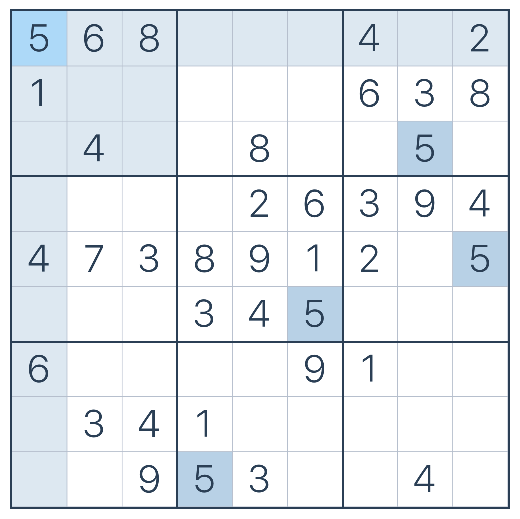
<!--
![picture](https://drive.google.com/uc?id=1RkiDRrAZd29E20BE5jjnexiKWwclfwyH)
-->

Take a look at grid_easy again and test your code:




In [ ]:
helper = BaseSudokuResolver(grid_easy)
print("is_safe_in_row", all([
    not helper.is_safe_in_row(0, 2),
    not helper.is_safe_in_row(0, 4),
    not helper.is_safe_in_row(0, 5),
    not helper.is_safe_in_row(0, 6),
    not helper.is_safe_in_row(0, 8),
    helper.is_safe_in_row(0, 1),
    helper.is_safe_in_row(0, 3),
    helper.is_safe_in_row(0, 7),
    helper.is_safe_in_row(0, 9)
]))

print("is_safe_in_col", all([
    not helper.is_safe_in_col(0, 1),
    not helper.is_safe_in_col(0, 4),
    not helper.is_safe_in_col(0, 5),
    not helper.is_safe_in_col(0, 6),
    helper.is_safe_in_col(0, 2),
    helper.is_safe_in_col(0, 3),
    helper.is_safe_in_col(0, 7),
    helper.is_safe_in_col(0, 8),
    helper.is_safe_in_col(0, 9),
]))

print("is_safe_in_square", all([
    not helper.is_safe_in_square(0, 1),
    not helper.is_safe_in_square(0, 4),
    not helper.is_safe_in_square(0, 5),
    not helper.is_safe_in_square(0, 6),
    not helper.is_safe_in_square(0, 8),
    helper.is_safe_in_square(0, 2),
    helper.is_safe_in_square(0, 3),
    helper.is_safe_in_square(0, 7),
    helper.is_safe_in_square(0, 9),
]))

print("square_from_position", all([
    helper.square_from_position(0, 0) == 0,
    helper.square_from_position(1, 1) == 0,
    helper.square_from_position(3, 3) == 4,
    helper.square_from_position(3, 6) == 5,
]))

print("is_safe_num", all([
    not helper.is_safe_num(2, 2, 1),
    helper.is_safe_num(2, 2, 2),
    not helper.is_safe_num(2, 2, 3),
    not helper.is_safe_num(2, 2, 4),
    helper.is_safe_num(2, 2, 7),
    not helper.is_safe_num(2, 2, 9),
]))

is_safe_in_row True
is_safe_in_col True
is_safe_in_square True
square_from_position True
is_safe_num True


## <font color="green">Exercise 4: </font> Implement the SimpleSudokuResolver with backtracking method (40 pts)

In this version, we will use __backtracking__ method to resolve the Sudoku problem. __Backtracking__ helps to check whether it is safe to assign before assigning a number. Thus, we check that the same number is not present in the current row, current column and current 3X3 subgrid. After checking for safety, assign the number, and recursively check whether this assignment leads to a solution or not.

In practice, we have the following procedure:
* In `find_solution`, calling try_num(0, 0) to start with the first cell. <font color="AA5500">Note: The <code>find_solution</code> was completed by us. You don't need to do anything to complete this step.</font>
* If the value of that cell is greater than 0, go to next cell (row, col + 1) or (row + 1, 0) if col == 8.
* If the value of that cell equals 0, try to set this cell to a value from 1 to 9 if it is a safe number (using <code>is_safe_num</code> function)
  * With each value, go to next cell by calling try_num(row, col + 1) or try_num(row + 1, 0)
  * If found a solution (i.e., satisfy the constraints as mentioned above ), return True
  * If can not find a solution, set that cell to 0 again and come back to the previous cell
* Return False if we can not find a solution

Reference: https://www.geeksforgeeks.org/sudoku-backtracking-7/

In [ ]:
class SimpleSudokuResolver(BaseSudokuResolver):
    def find_empty_cell_with_fewest_options(self):
        """
        Finds the cell with the minimum remaining values (MRV).
        """
        min_options = 10  # Set initial value greater than any possible options
        best_cell = None
        for row in range(9):
            for col in range(9):
                if self.grid[row][col] == 0:  # Only check empty cells
                    possible_values = [num for num in range(1, 10) if self.is_safe_num(row, col, num)]
                    if len(possible_values) < min_options:
                        min_options = len(possible_values)
                        best_cell = (row, col)
                        if min_options == 1:  # Early exit if only one option
                            return best_cell
        return best_cell

    def try_num(self, row=0, col=0, use_mrv=False):
        # Use MRV if requested or for harder puzzles
        if use_mrv:
            cell = self.find_empty_cell_with_fewest_options()
            if cell is None:
                return True  # Puzzle solved
            row, col = cell

        # Check if we are out of bounds (puzzle is solved)
        if row >= 9:
            return True
        if col >= 9:
            return self.try_num(row + 1, 0, use_mrv)

        # If the cell is already filled, move to the next cell
        if self.grid[row][col] > 0:
            return self.try_num(row, col + 1, use_mrv)

        # Collect possible values for the cell
        possible_values = [num for num in range(1, 10) if self.is_safe_num(row, col, num)]

        for num in possible_values:
            self.grid[row][col] = num  # Place the number

            # Try next cell with MRV after first few steps or in complex puzzles
            if self.try_num(row, col + 1, use_mrv=True if row > 4 else False):
                return True

            # Backtrack by resetting the cell
            self.grid[row][col] = 0

        return False


### ❇️TESTING ZONE❇️

In [ ]:
solver1 = SimpleSudokuResolver(grid_easy)
if solver1.find_solution() and solver1.check_grid():
  print("Found a solution:")
  solver1.print_grid()
else:
  print("No solution or invalid solution found!")

Execution time: 0.030491352081298828 seconds

Found a solution:
5 6 8 9 1 3 4 7 2 
1 9 7 2 5 4 6 3 8 
3 4 2 6 8 7 9 5 1 
8 5 1 7 2 6 3 9 4 
4 7 3 8 9 1 2 6 5 
9 2 6 3 4 5 8 1 7 
6 8 5 4 7 9 1 2 3 
7 3 4 1 6 2 5 8 9 
2 1 9 5 3 8 7 4 6 


In [ ]:
solver2 = SimpleSudokuResolver(grid_expert)
if solver2.find_solution() and solver2.check_grid():
    print("Found a solution:")
    solver2.print_grid()
else:
    print("No solution or invalid solution found!")

KeyboardInterrupt: 

# Part 3: Improved Version

In the first version SimpleSudokuResolver, it works well but the processing time to resolve the sudoku_expert puzzle is about 1 minute. Let's try to improve it to make it run faster by using __constraint propagation__ method!

In the improved version, __constraint propagation__ helps to reduce the search space. It starts with an initial set of known numbers and repeatedly applies logical deductions based on the Sudoku rules. For example, when we fill a number into a cell(row, col), we will remove that number from the search space of the specific row, column and square.


To implement this code, we will create 3 lists of the set (<code>avai_rows</code>, <code>avai_cols</code>, <code>avai_squares</code>) to save the available values for each row, col, or square. For example, <code>avail_rows[0]</code> will show the available values which can be assigned to other cell in the first row. The <code>avail_rows[0]</code> for sudoku_easy should be <code>{1, 3, 7, 9}</code>, while it should be <code>{1, 2, 3, 5, 6, 7, 8, 9}</code> for sudoku_expert.

## <font color="green">Exercise 5 (Extra Credit): </font> Implement the ImprovedSudokuResolver with Constraint Propagation method (1 extra credit in the final grade)

**In practice, we have the following procedure:**
* Update __init__() function to compute <code>avai_rows</code>, <code>avai_cols</code>, <code>avai_squares</code> after loading <code>grid</code>
* In `find_solution`, call try_num(0, 0) to start with the first cell. <font color="AA5500">Note: The <code>find_solution</code> was completed by us. You don't need to do anything to complete this step.</font>
* If the value of that cell is greater than 0, go to next cell (row, col + 1) or (row + 1, 0) if col == 8.
* If the value of that cell equals 0, try to set this cell to a value that is in intersection of 3 sets <code>avai_rows</code>, <code>avai_cols</code>, <code>avai_squares</code>, then remove that value from 3 sets.<font color="AA5500">Hint: Using [set.intersection()](https://www.geeksforgeeks.org/intersection-function-python/) to get the intersection set.</font>
  * With each value, go to next cell by calling try_num(row, col + 1) or try_num(row + 1, 0)
  * If found a solution (i.e., satisfy the constraints as mentioned above ), return True
  * If can not find a solution, set that cell to 0 again, add that value back to 3 sets, and come back to the previous cell.
* Return False if we can not find a solution

In [ ]:
class ImprovedSudokuResolver(BaseSudokuResolver):
    def __init__(self, grid):
        super().__init__(grid)

        # Initialize available sets for rows, columns, and squares
        self.avai_rows = [set(range(1, N+1)) for _ in range(N)]
        self.avai_cols = [set(range(1, N+1)) for _ in range(N)]
        self.avai_squares = [set(range(1, N+1)) for _ in range(N)]

        # Populate available sets based on initial grid
        for row in range(N):
            for col in range(N):
                num = grid[row][col]
                if num != 0:
                    self.avai_rows[row].discard(num)
                    self.avai_cols[col].discard(num)
                    square_index = self.square_from_position(row, col)
                    self.avai_squares[square_index].discard(num)

    def try_num(self, row: int, col: int) -> bool:
        # If we reach the end of the grid, the puzzle is solved
        if row == 9:
            return True

        # Move to the next row if we reach the end of the current row
        if col == 9:
            return self.try_num(row + 1, 0)

        # If the cell is already filled, move to the next cell
        if self.grid[row][col] > 0:
            return self.try_num(row, col + 1)

        # Determine the square index for constraint propagation
        square_index = self.square_from_position(row, col)

        # Calculate the intersection of available values
        possible_values = self.avai_rows[row] & self.avai_cols[col] & self.avai_squares[square_index]

        # Try each possible value in the intersection
        for num in possible_values:
            # Place the number and update availability sets
            self.grid[row][col] = num
            self.avai_rows[row].remove(num)
            self.avai_cols[col].remove(num)
            self.avai_squares[square_index].remove(num)

            # Recursively try to solve with this number placed
            if self.try_num(row, col + 1):
                return True

            # Backtrack: reset cell and add number back to availability sets
            self.grid[row][col] = 0
            self.avai_rows[row].add(num)
            self.avai_cols[col].add(num)
            self.avai_squares[square_index].add(num)

        # Return False if no value leads to a solution
        return False


### ❇️TESTING ZONE❇️

In [ ]:
solver2 = ImprovedSudokuResolver(grid_expert)

if solver2.find_solution() and solver2.check_grid():
  print("Found a solution:")
  solver2.print_grid()
else:
  print("No solution or invalid solution found!")

Execution time: 3.222510576248169 seconds

Found a solution:
7 1 8 9 2 6 3 4 5 
5 6 2 4 7 3 8 9 1 
4 9 3 8 5 1 7 2 6 
3 2 1 6 8 5 4 7 9 
6 4 7 2 1 9 5 3 8 
9 8 5 7 3 4 1 6 2 
2 7 4 5 6 8 9 1 3 
1 5 9 3 4 2 6 8 7 
8 3 6 1 9 7 2 5 4 


Congratulation! Now, this version run faster a lot than the first version. (< 1 seconds vs 30 seconds)

# Conclusion
In conclusion, Constraint Satisfaction Problem (CSP) is a fundamental topic in artificial intelligence (AI) that deals with solving problems by identifying constraints and finding solutions that satisfy those constraints. CSP has a wide range of applications, including scheduling, resource allocation, and automated reasoning. But if could create a huge number of states if we try all values in each object. Both of 2 above solutions have the same time complexity $O(9^{N \times N})$ in the worse case, but if we have some good pruning techniques, it will make your solution runs faster a lot.